In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd

In [5]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [38]:
#### feature를 컬럼으로 DataFrame 생성
data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [180]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2 , random_state = 0
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2,random_state=0)

## RandomForestClassifier 모델 생성(모델명 forest). 결정트리갯수는 100
forest = RandomForestClassifier(n_estimators=100)
## 학습시킴
forest.fit(X_train,y_train)
forest


RandomForestClassifier()

In [181]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함

print('Training DataSet 정확도:{:3f}'.format(forest.score(X_train,y_train)))
print('Test DataSet 정확도:{:3f}'.format(forest.score(X_test,y_test)))

Training DataSet 정확도:1.000000
Test DataSet 정확도:0.973684


In [186]:
## 하이퍼 파라미터값을 지정...오버핏팅이 줄어들고 정확도가 올라가는 값으로 지정하자
## 데이타의 단순성 때문에 Test 정확도가 함께 내려갈 가능성도 있음
## max_features=?
## max_depth=?
from sklearn.tree import DecisionTreeClassifier
forest = DecisionTreeClassifier(max_depth=8,random_state=0)
forest.fit(X_train, y_train)

print('Training DataSet 정확도:{:3f}'.format(forest.score(X_train,y_train)))
print('Test DataSet 정확도:{:3f}'.format(forest.score(X_test,y_test)))

Training DataSet 정확도:0.997802
Test DataSet 정확도:0.947368


In [187]:
# 특성 중요도 출력하기
print('특성중요도:\n{}'.format(forest.feature_importances_))

특성중요도:
[0.02915458 0.00799563 0.         0.         0.03289629 0.
 0.00295129 0.         0.0166309  0.         0.0018484  0.
 0.0076758  0.00301888 0.01812102 0.         0.         0.
 0.         0.         0.         0.00977606 0.0150401  0.13713849
 0.         0.         0.00938516 0.69909154 0.         0.00927587]


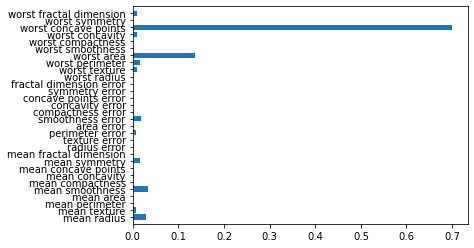

In [188]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)


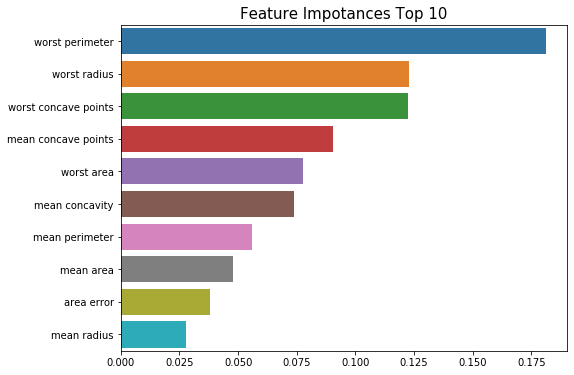

In [12]:
# 중요도 순으로 졍렬해서 시각화




In [15]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자



max_depth=1 정확도 :0.8741
max_depth=3 정확도 :0.8811
max_depth=4 정확도 :0.8741
max_depth=6 정확도 :0.8811
max_depth=10 정확도 :0.8881
max_depth=15 정확도 :0.8881
